### Title: Telco Churn Classification Project

#### Project Objective:
This project seeks to predict customer churn within the telecom sector by identifying key drivers of churn and implementing strategies to reduce it. By employing classification models, the analysis will provide actionable insights from customer data, enabling companies to improve customer retention and, consequently, increase revenue.

### 1.0 Business Understanding

### 1.1 Introduction
Customer churn is a critical issue in the telecom industry, leading to reduced profit margins and long-term sustainability concerns. Churn occurs when customers discontinue their service and switch to competitors. It is driven by factors such as pricing, service quality, network coverage, and competitive offerings. The implications of high churn include:

- Revenue loss
- Decreased ROI on marketing
- Reputational damage due to customer dissatisfaction
- Reduced market share and growth
- Lower employee satisfaction
- Financial uncertainty

Due to this, Machine Learning and Advanced Analytics provide the necessary technologies to transform raw data into actionable insights. In this project, classification models will be employed to generate these insights.

### 1.2 Project Objective
The goal is to develop a classification model that predicts whether customers are likely to leave or continue their relationship with the telecom company. By identifying customers at risk of churning, the company can implement proactive retention strategies, thereby increasing revenue and improving profit margins.

### 1.3 Data Description
The project will utilize historical data containing details on customer behaviors and transaction records. Data will be retrieved from multiple sources, including a database, a GitHub repository, and OneDrive.

### 1.4 Success Metrics
- Good: Achieving at least 75% accuracy in predicting churn, as measured by the harmonic F1-score.
- Excellent: Achieving at least 80% accuracy in predicting churn.

### 1.5 Hypothesis
Hypothesis 1
- Null Hypothesis (H₀): There is no significant relationship between customer tenure and the likelihood of churn.
- Alternative Hypothesis (H₁): Customers with longer tenures are less likely to churn compared to those with shorter tenures.


### 1.6 Business Questions
- Which service-related factors (e.g., internet service, tech support, streaming options) have the greatest impact on customer churn?

- How does the customer's payment method influence the likelihood of churn?

- Are long-term contracts (e.g., one-year, two-year contracts) more effective at reducing churn compared to month-to-month contracts?

- What is the relationship between monthly charges and customer churn?

- How does the tenure of a customer affect their likelihood to churn?


### 2.0 Data Understanding


### 2.1 Inspecting the dataset in depth:
A. Data Quality Assessment: This involves checking the dataset for issues such as missing values, duplicates, and basic descriptive statistics (e.g., info(), handling null values, etc.).

B. Univariate Analysis: Exploring, analyzing, and visualizing key variables individually, without considering their relationship to other variables.

C. Bivariate Analysis: Exploring, analyzing, and visualizing the relationship between pairs of variables, especially across different dimensions.

D. Multivariate Analysis: Analyzing the relationships between multiple variables simultaneously to better understand complex interactions.

E. Answer Analytical Questions: Answering specific questions raised during analysis to provide data-driven insights.

F. Test Hypothesis: Testing predefined hypotheses using statistical tests to validate assumptions or insights.

G. Provide Insights: Drawing conclusions and providing actionable insights based on the analyses conducted.

This structured approach ensures thorough understanding and interpretation of the dataset for meaningful insights.

### 2.2 Installing and importing necessary libraries 

In [2]:
import pandas as pd
import numpy as np

#supress all warnings 
import warnings
warnings.filterwarnings('ignore')

#set display options to view all colums in dataset 
pd.set_option('display.max_columns',None) 

### 2.3 Loading Data

In [3]:
#loading data 
#first data
train_1 = pd.read_csv('LP2_Telco-churn-second-2000.csv')


In [4]:
#checking data info
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [5]:
train_1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
train_1.duplicated().sum()

0

In [7]:
# checking the rows and columns we are working
train_1.shape

(2043, 21)

In [8]:
#importing models for sql data extrations 
import pyodbc    
from dotenv import dotenv_values,load_dotenv
import os




In [9]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [10]:

connection = pyodbc.connect(connection_string)

In [11]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"

train_2 = pd.read_sql(query, connection)

In [12]:
train_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [13]:
# checking second data info
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [14]:
# check if there is missing data
train_2.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [15]:
#check if there is likelihood of duplicated data
train_2.duplicated().sum()

0

In [16]:
#checking shape of the data 2
train_2.shape

(3000, 21)

In [17]:

#%pip install openpyxl
#test data
test_data = pd.read_excel('Telco-churn-last-2000.xlsx')
test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [18]:
# check info of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [19]:
# Checking missing data
test_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [20]:
#check likelihood of duplicate of data
test_data.duplicated().sum()

0

In [21]:
#checking the shape of data
test_data.shape

(2000, 20)

### 2.3.1 Data Cleaning

In [22]:
# let combine the data the two training data
train_data = pd.concat([train_1,train_2],ignore_index=True)


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [24]:
train_data.shape

(5043, 21)

In [25]:
train_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [26]:
#converting the total charges column to int 
train_data['TotalCharges']=pd.to_numeric(train_data['TotalCharges'],errors='coerce')

test_data['TotalCharges']=pd.to_numeric(test_data['TotalCharges'],errors='coerce')


In [27]:
print(train_data['TotalCharges'].dtype)

float64


In [28]:
#checking missing data in the train data
train_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [29]:
## inputing missing values 

def unique_values(dataframe):
    unique_summary =[]

    for column in dataframe.columns:
        values = dataframe[column].unique()
        counts_values = len(values)

        unique_summary.append({
            'column':column,
            'unique_values':values,
            'count_of_unique_value':counts_values
        })

    usummary = pd.DataFrame(unique_summary)
    return usummary

In [30]:
unique_values(train_data)

,column,unique_values,count_of_unique_value
0,customerID,"[5600-PDUJF, 8292-TYSPY, 0567-XRHCU, 1867-BDVF...",5043
1,gender,"[Male, Female]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[No, Yes, True, False]",4
4,Dependents,"[No, Yes, False, True]",4
5,tenure,"[6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12...",73
6,PhoneService,"[Yes, No, False, True]",4
7,MultipleLines,"[No, No phone service, Yes, None, False, True]",6
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[No, Yes, No internet service, False, True, None]",6


In [31]:
# Droping customer id 

train_data.drop(columns='customerID',inplace=True)
test_data.drop(columns='customerID',inplace=True)

train_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [32]:
# Converting to Yes and No wiles creating a list for the categorical columns 

labels = train_data.select_dtypes(include='object').columns.to_list()
labels

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [33]:
# Converting to string 
train_data[labels] = train_data[labels].astype(str)

In [34]:
# function to make changes 

binary ={
    'No':['No','0','No internet service', 'False', 'No phone service'],
    'Yes':['True','1']
}

def correct_column(train_data, labels, binary):
    for column_name in labels:
        for key, values in binary.items():
            train_data[column_name]= train_data[column_name].replace(values,key)

    return train_data

train_data  = correct_column(train_data,labels,binary)

In [35]:
unique_values(train_data)

,column,unique_values,count_of_unique_value
0,gender,"[Male, Female]",2
1,SeniorCitizen,"[No, Yes]",2
2,Partner,"[No, Yes]",2
3,Dependents,"[No, Yes]",2
4,tenure,"[6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12...",73
5,PhoneService,"[Yes, No]",2
6,MultipleLines,"[No, Yes, None]",3
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[No, Yes, None]",3
9,OnlineBackup,"[No, Yes, None]",3


In [36]:
# Creating a list for the numerical columns

numbers =train_data[['tenure', 'TotalCharges','MonthlyCharges']]
numbers

,tenure,TotalCharges,MonthlyCharges
0,6,312.700000,49.500000
1,19,1046.500000,55.000000
2,69,2960.100000,43.950000
3,11,834.200000,74.350000
4,64,6953.400000,111.150000
...,...,...,...
5038,1,25.250000,25.250000
5039,18,1156.349976,60.599998
5040,69,6143.149902,89.949997
5041,2,144.800003,74.750000


### Univariat Analysis

In [37]:
train_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5035.000000
mean,32.576641,65.090214,2302.062861
std,24.529807,30.068133,2269.483576
min,0.000000,18.400000,18.799999
25%,9.000000,35.775000,417.675003
50%,29.000000,70.550003,1401.150024
75%,56.000000,90.050003,3862.000000
max,72.000000,118.650002,8670.100000


In [38]:
# Importing viusal tools
import matplotlib.pyplot as plt
import seaborn as sns


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


skewness:0
kurtosis:-1
mean:33
median:29
---------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


skewness:1
kurtosis:0
mean:2302
median:1401
---------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


skewness:0
kurtosis:-1
mean:65
median:71
---------------


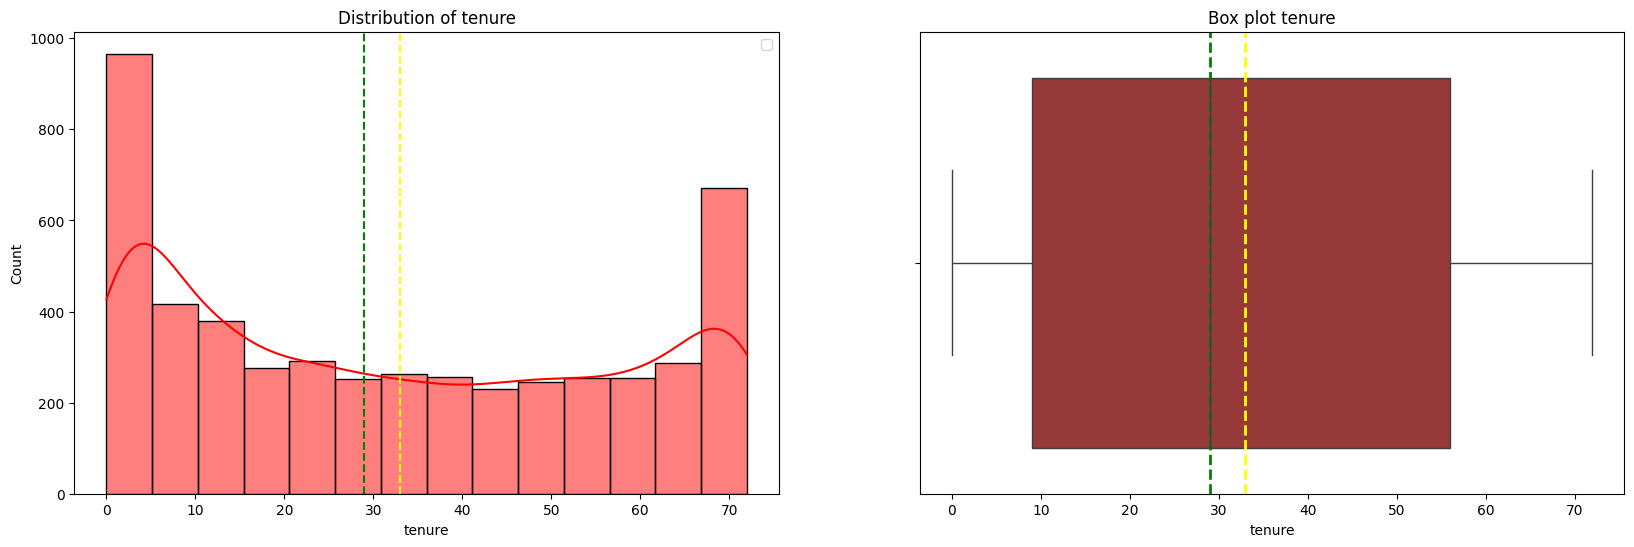

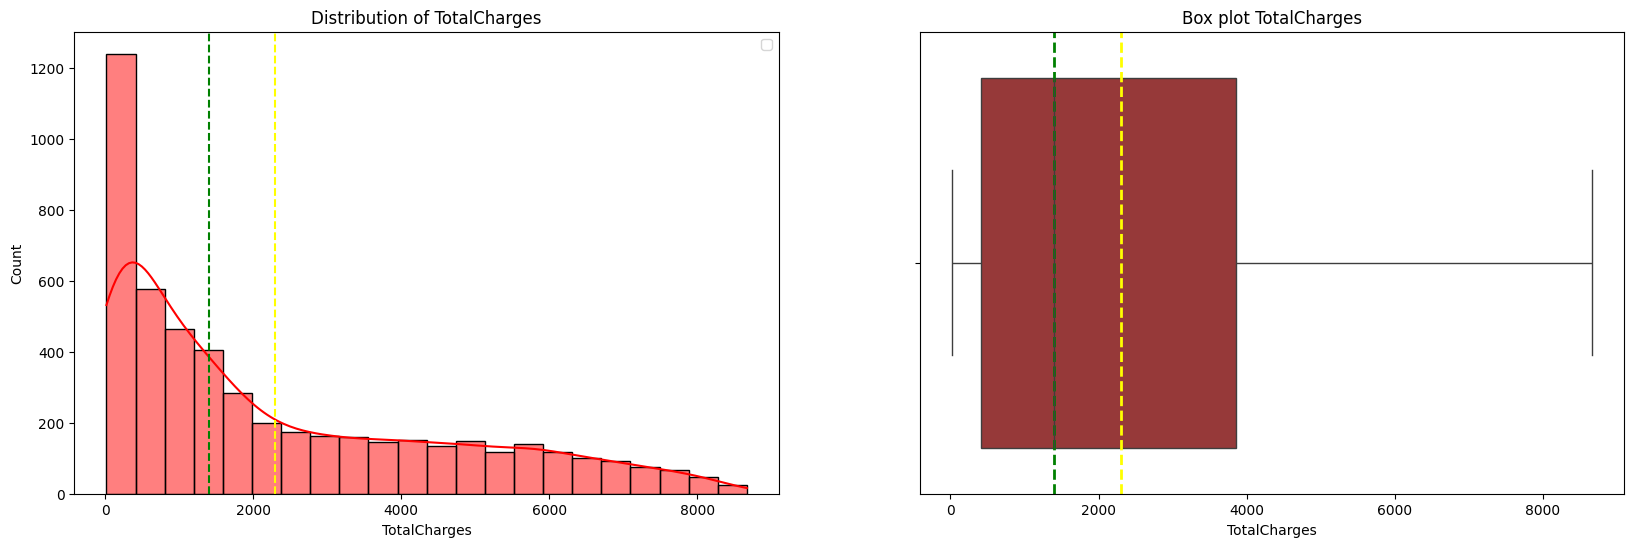

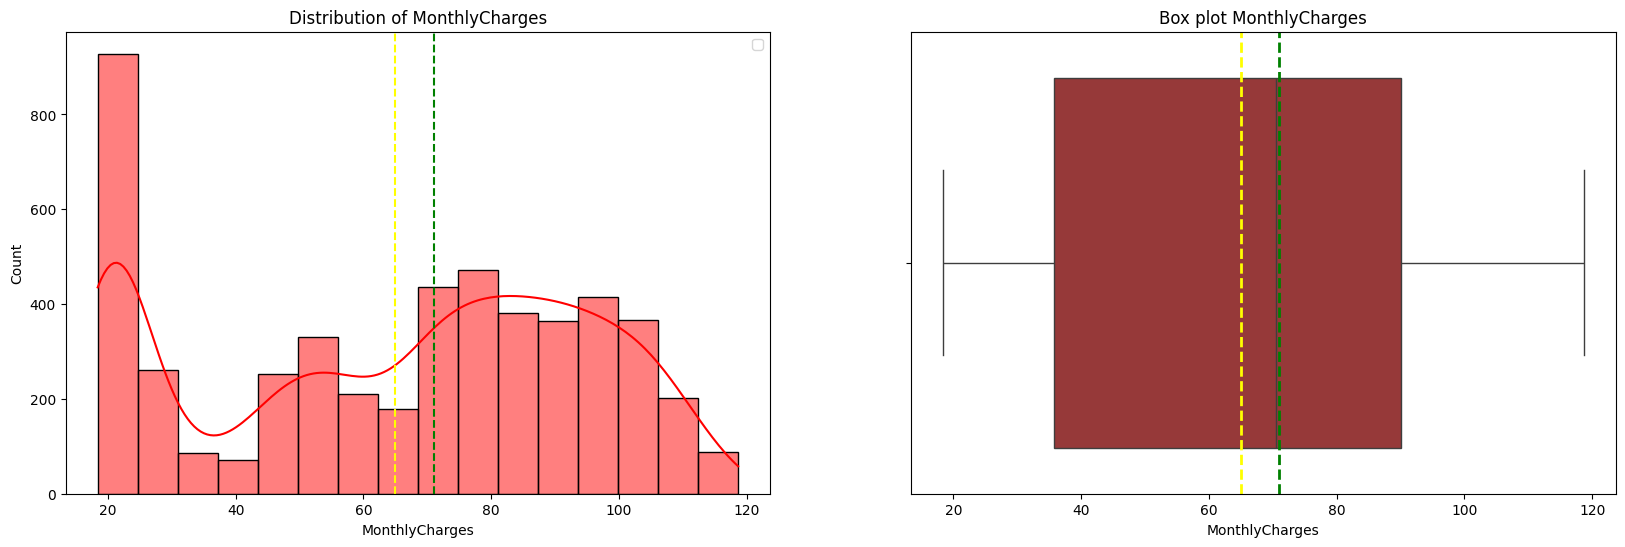

In [45]:
for col in numbers:
    skewness = round(numbers[col].skew())
    kurtosis = round(numbers[col].kurtosis())
    mean = round(numbers[col].mean())
    median = round(numbers[col].median())

    #print the columns and their values
    print(f'skewness:{skewness}')
    print(f'kurtosis:{kurtosis}')
    print(f'mean:{mean}')
    print(f'median:{median}')
    print("-"*15)

        # setting plot size
    plt.figure(figsize=(20,6))

    #histplot
    plt.subplot(1,2,1)
    sns.histplot(numbers[col],kde=True, color='red', edgecolor ='black')
    plt.axvline(mean, color ='yellow',linestyle ='dashed')
    plt.axvline(median, color ='green',linestyle ='dashed')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x= numbers[col], color='brown')
    plt.axvline(mean, color ='yellow',linestyle ='dashed', linewidth =2)
    plt.axvline(median, color ='green',linestyle ='dashed', linewidth =2)
    plt.title(f'Box plot {col}')


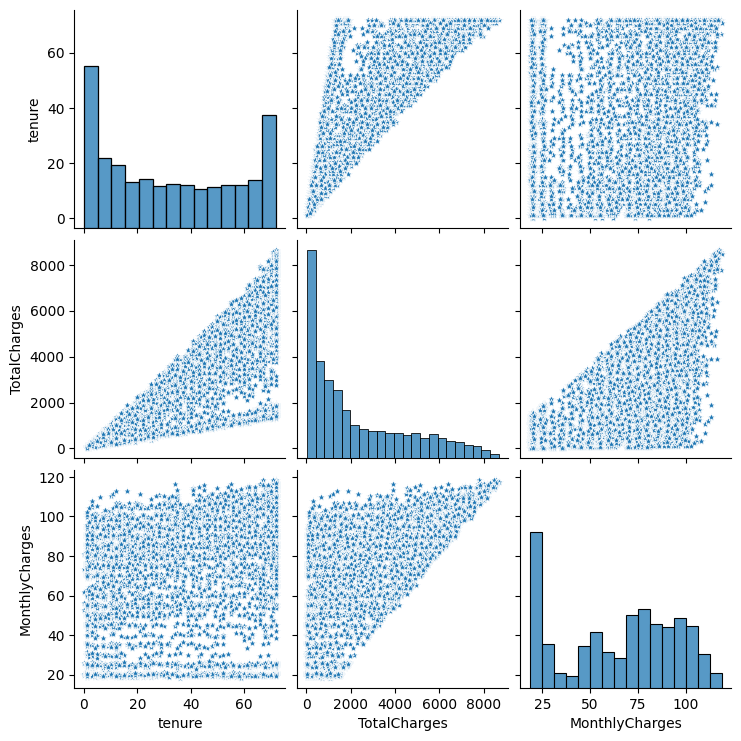

In [46]:

sns.pairplot(numbers, markers='*',palette= 'viridis')

In [ ]:
# for categorical data 

def visual_cat(train_data,column):
    fig, axis =plt.subplot(3, len(column), figsize=(15,10))
    